<a href="https://colab.research.google.com/github/abshek7/intial_v/blob/main/clustering_algorithms_usla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
np.random.seed(0)
n_stores = 300
latitude = np.random.uniform(low=40.5, high=40.9, size=n_stores)  # Example range (New York City)
longitude = np.random.uniform(low=-74.0, high=-73.7, size=n_stores)  # Example range (New York City)

Simulating store locations in a city based on latitude and longitude.
Sample of store locations:
     Latitude  Longitude
0  40.719525 -73.728033
1  40.786076 -73.767786
2  40.741105 -73.900056
3  40.717953 -73.975670
4  40.669462 -73.877828
Shape of the dataset: (300, 2)


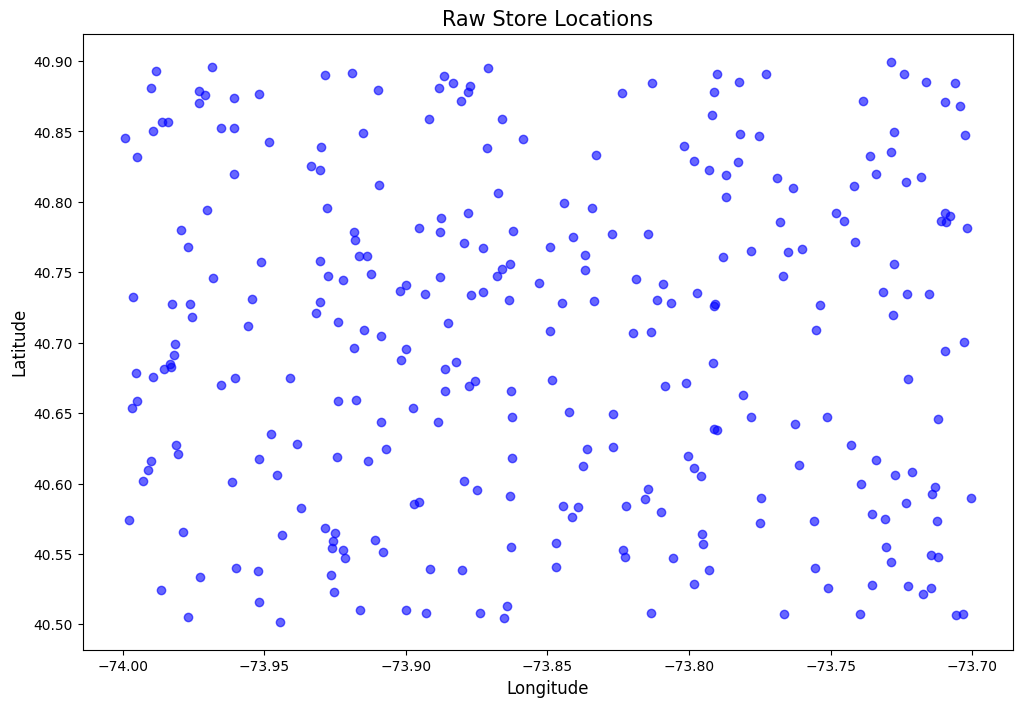

In [ ]:
data = pd.DataFrame({'Latitude': latitude, 'Longitude': longitude})

# Display the first few rows of the dataset
print("Simulating store locations in a city based on latitude and longitude.")
print("Sample of store locations:\n", data.head())
print("Shape of the dataset:", data.shape)

# Plot the raw data points
plt.figure(figsize=(12, 8))
plt.scatter(data['Longitude'], data['Latitude'], c='blue', marker='o', alpha=0.6)
plt.title('Raw Store Locations', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()


Standardizing the latitude and longitude for clustering...
Sample of scaled features:
 [[ 0.15625042  1.39690714]
 [ 0.72998111  0.94942617]
 [ 0.34229121 -0.53950349]
 [ 0.1426971  -1.39065699]
 [-0.27534698 -0.28928073]]

Using the elbow method to determine the optimal number of clusters...
Number of clusters: 1, WCSS: 600.0000000000001
Number of clusters: 2, WCSS: 372.68314446490643
Number of clusters: 3, WCSS: 233.33719307262177
Number of clusters: 4, WCSS: 146.01858468986345
Number of clusters: 5, WCSS: 118.2076965734057
Number of clusters: 6, WCSS: 96.55308939601784
Number of clusters: 7, WCSS: 81.97150146369287
Number of clusters: 8, WCSS: 71.66056615700572
Number of clusters: 9, WCSS: 63.58151265646384
Number of clusters: 10, WCSS: 55.71729880083797


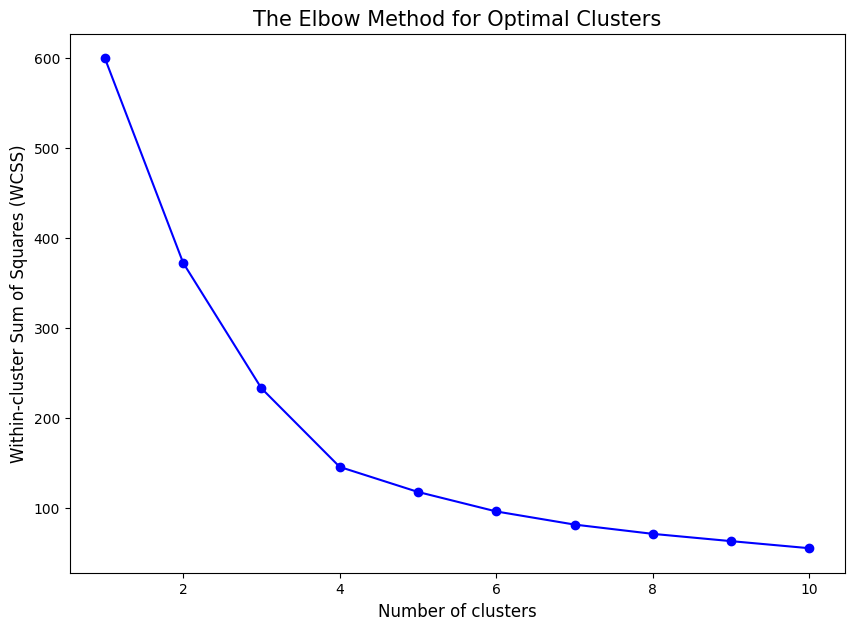

In [ ]:
# Prepare the data for clustering
X = data[['Latitude', 'Longitude']].values

# Standardize the features
print("\nStandardizing the latitude and longitude for clustering...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Sample of scaled features:\n", X_scaled[:5])

# Use the elbow method to find the optimal number of clusters
print("\nUsing the elbow method to determine the optimal number of clusters...")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    print(f"Number of clusters: {i}, WCSS: {kmeans.inertia_}")

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('The Elbow Method for Optimal Clusters', fontsize=15)
plt.xlabel('Number of clusters', fontsize=12)
plt.ylabel('Within-cluster Sum of Squares (WCSS)', fontsize=12)
plt.show()


In [ ]:
# Choose optimal clusters based on the elbow method (e.g., 4 clusters)
optimal_clusters = 4
print(f"\nBased on the elbow method, we select {optimal_clusters} clusters.")
print(f"Training K-Means with {optimal_clusters} clusters...")
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_scaled)

# Show the cluster centers
print("\nCluster centers (in scaled form):\n", kmeans.cluster_centers_)
print("Cluster labels for the first 5 samples:\n", y_kmeans[:5])

# Add cluster labels to the DataFrame
data['Cluster'] = y_kmeans

# Get cluster centers and inverse transform to original scale
centers_scaled = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers_scaled)

# Plot the clustering results (latitude vs longitude) with cluster centers
print("\nVisualizing the clusters and their respective centers...")



Based on the elbow method, we select 4 clusters.
Training K-Means with 4 clusters...

Cluster centers (in scaled form):
 [[-0.83229049 -0.85517057]
 [ 0.83250794 -0.75445977]
 [-0.9981529   0.90383779]
 [ 0.82224007  0.97672112]]
Cluster labels for the first 5 samples:
 [3 3 1 1 0]

Visualizing the clusters and their respective centers...


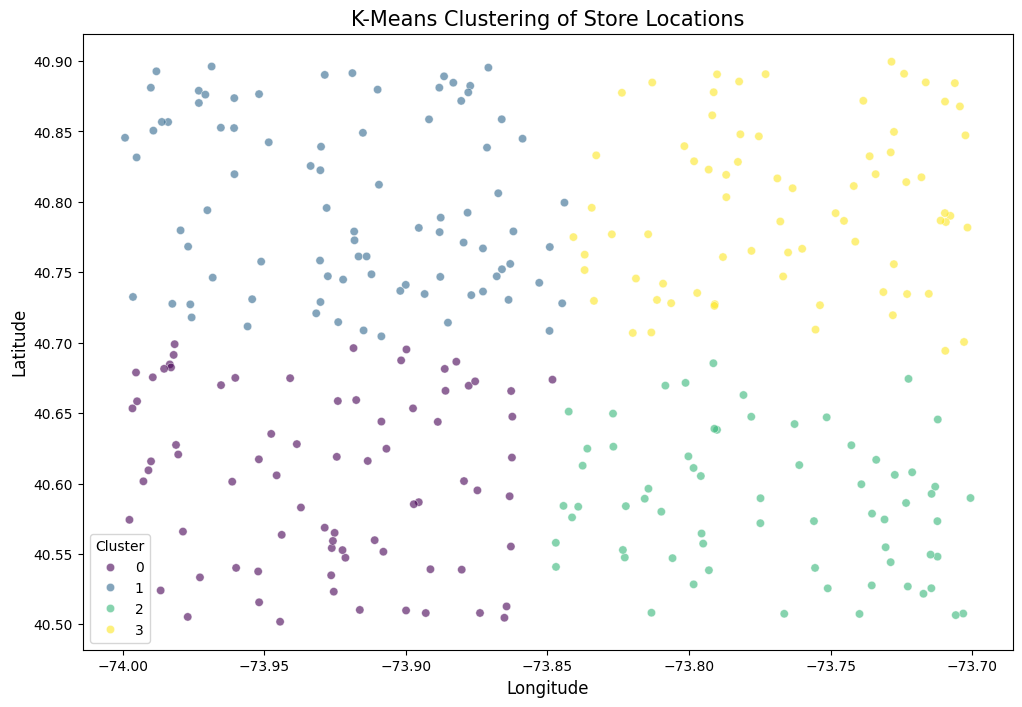

In [ ]:
# Plot of clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue='Cluster', palette='viridis', data=data, marker='o', alpha=0.6)
plt.title('K-Means Clustering of Store Locations', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster')
plt.show()

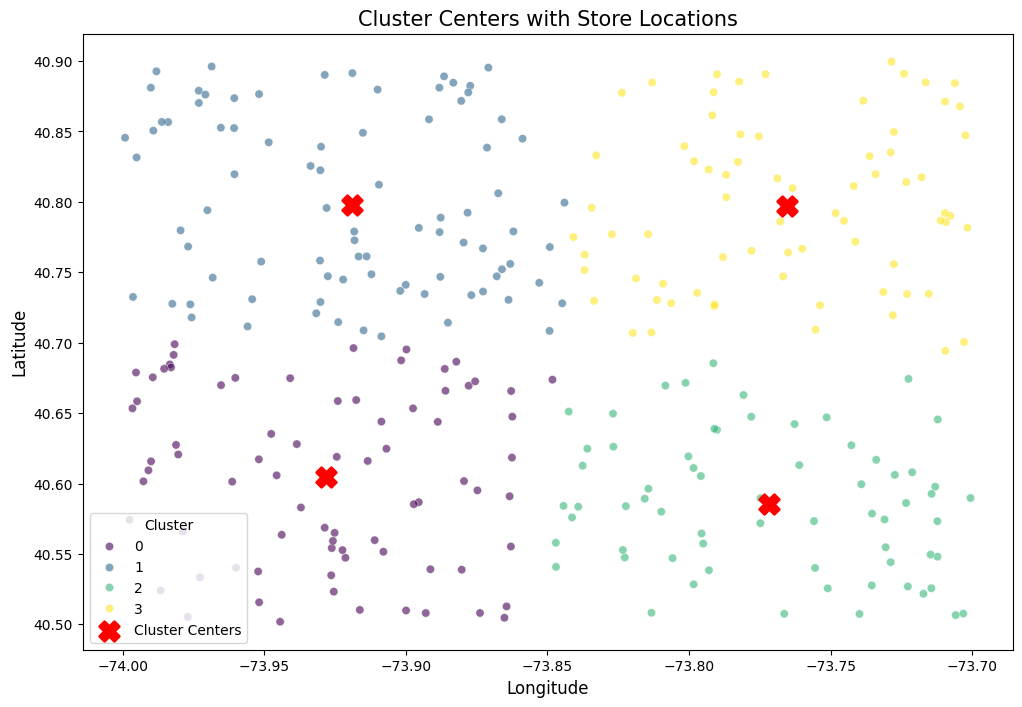

In [ ]:
# Plot of cluster centers
plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['Longitude'], y=data['Latitude'], hue='Cluster', palette='viridis', data=data, marker='o', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 0], c='red', marker='X', s=200, linewidths=2, label='Cluster Centers')
plt.title('Cluster Centers with Store Locations', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Cluster')
plt.show()


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print("Sample of Iris dataset:\n", data.head())
print("Shape of the dataset:", data.shape)


Sample of Iris dataset:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
Shape of the dataset: (150, 4)


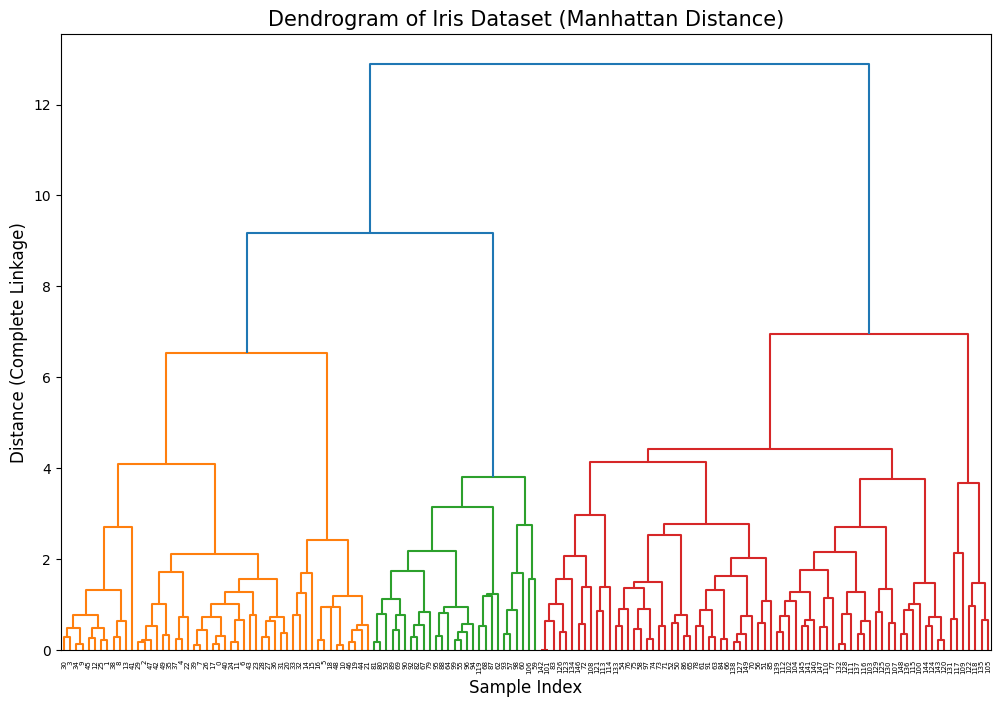

In [22]:
X = data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linked = linkage(X_scaled, method='complete', metric='cityblock')

plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram of Iris Dataset (Manhattan Distance)', fontsize=15)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance (Complete Linkage)', fontsize=12)
plt.show()

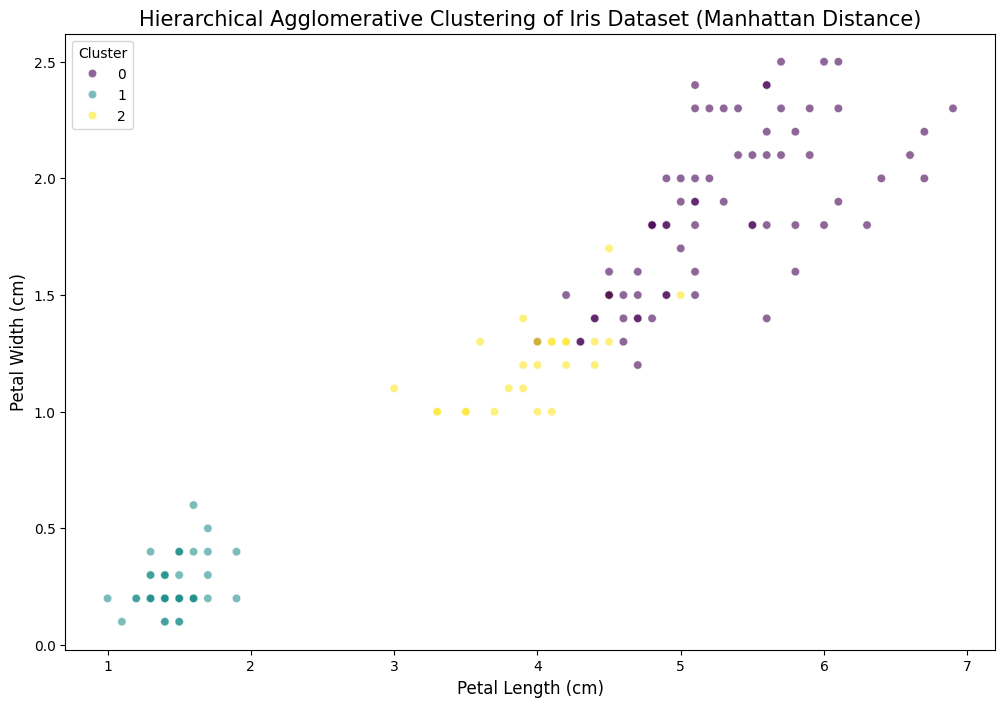

In [25]:
n_clusters = 3
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')
y_agg = agg_clustering.fit_predict(X_scaled)
data['Cluster'] = y_agg

plt.figure(figsize=(12, 8))
sns.scatterplot(x=data['petal length (cm)'], y=data['petal width (cm)'], hue='Cluster', palette='viridis', data=data, marker='o', alpha=0.6)
plt.title('Hierarchical Agglomerative Clustering of Iris Dataset (Manhattan Distance)', fontsize=15)
plt.xlabel('Petal Length (cm)', fontsize=12)
plt.ylabel('Petal Width (cm)', fontsize=12)
plt.legend(title='Cluster')
plt.show()
